## Preparing Packages and Loading Dataset 

In [1]:
from sklearn import linear_model, metrics
import numpy
import csv

X_to_replace = [ [0] ] * 10 
Y_to_replace = [  0  ] * 10 

class FileFormatException(Exception):
    def __init__(self, line_number):
        super().__init__()
        self.line_number = line_number

def load_csv_in_sklearn_format( input_file_name ):
    X = X_to_replace
    Y = Y_to_replace
    return X, Y

In [2]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_load_correct_file(self):
        x,y = load_csv_in_sklearn_format("linear_dataset_100.csv")
        self.assertTrue(type(x) is list)
        self.assertEqual(len(x), 100)        
        self.assertTrue(type(x[0]) is list)
        self.assertEqual(len(x[0]), 1)        
        self.assertTrue(type(y) is list)
        self.assertEqual(len(y), 100)

    def test_load_corrupt_file(self):
        self.assertRaises(FileFormatException, load_csv_in_sklearn_format,"corrupt_dataset.csv")

unittest.main(argv=[''], verbosity=2, exit=False)

test_load_correct_file (__main__.TestNotebook.test_load_correct_file) ... FAIL
test_load_corrupt_file (__main__.TestNotebook.test_load_corrupt_file) ... FAIL

FAIL: test_load_correct_file (__main__.TestNotebook.test_load_correct_file)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\tida01\AppData\Local\Temp\ipykernel_21596\2108339424.py", line 8, in test_load_correct_file
    self.assertEqual(len(x), 100)
AssertionError: 10 != 100

FAIL: test_load_corrupt_file (__main__.TestNotebook.test_load_corrupt_file)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\tida01\AppData\Local\Temp\ipykernel_21596\2108339424.py", line 15, in test_load_corrupt_file
    self.assertRaises(FileFormatException, load_csv_in_sklearn_format,"corrupt_dataset.csv")
AssertionError: FileFormatException not raised by load_csv_in_sklearn_format

--------------------------

## Setup Visualisation

In [3]:
import matplotlib.pyplot as plt
colors = ["#eaeaf2", "#721817", "#2b4162", "#fa9f42"]

def prepare_plot():
    ax = plt.axes()
    ax.set_facecolor(colors[0])   

def finish_plot( filename=None, ylim=None ):
    legend = plt.legend(  )
    legend.get_frame().set_alpha( 0.0 )
    plt.xlim((-100,100))
    if not ylim is None:
        plt.ylim(ylim)        
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-110, 110)
    if not filename is None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
def plot_model_fit( X, Y, X_trend, Y_trend, ylim=None, filename=None):
    prepare_plot()    
    plt.scatter(X, Y, color=colors[1], alpha=0.75, label="Training Data")
    plt.plot(X_trend, Y_trend, color=colors[2], linewidth=3, label="Fitted Model")
    finish_plot( filename=filename, ylim=ylim )

def plot_test_data( X_predicted, Y_predicted, X_ground_truth, Y_ground_truth, filename=None, ylim=None):
    prepare_plot()
    plt.scatter(X_predicted,    Y_predicted,    color=colors[1], alpha=0.75, label="Model Prediction")
    plt.scatter(X_ground_truth, Y_ground_truth, color=colors[3], alpha=0.75, label="Ground Truth")
    finish_plot( filename=filename, ylim=ylim )

## Linear Regression

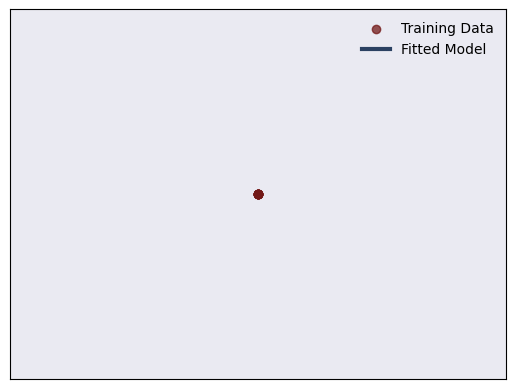

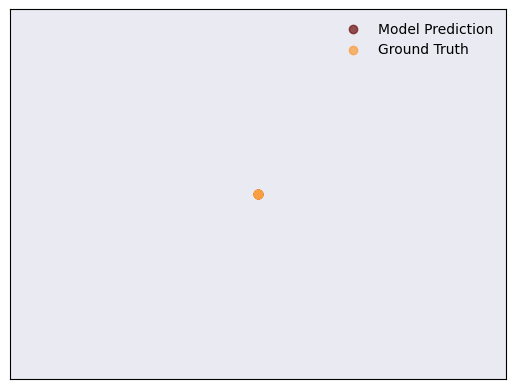

R2 Score: 0.0


In [4]:
X, Y = load_csv_in_sklearn_format( "linear_dataset_100.csv" )

Y_pred = Y_to_replace
# please extend here

plot_model_fit( X, Y, X_trend=X, Y_trend=Y_pred, filename="goodfit_linear_model.png" )

X_test, Y_ground_truth = load_csv_in_sklearn_format( "linear_dataset_test.csv" )

Y_pred_test = Y_to_replace
# please extend here

plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, filename="goodfit_linear_testdata.png" )

r2_score = 0.0
# please extend here
print( "R2 Score:", r2_score )

## Underfitting

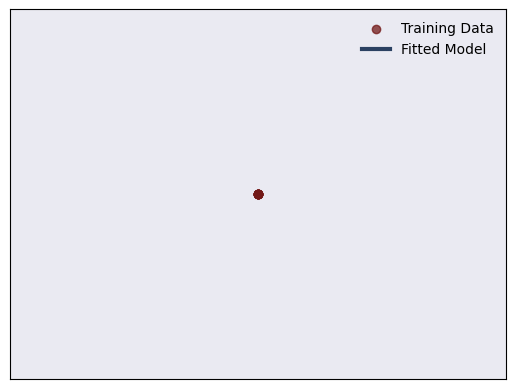

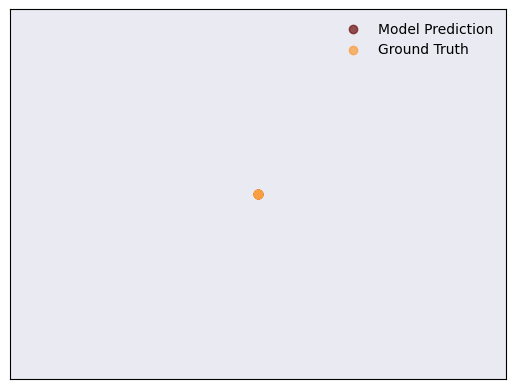

R2 Score: 0.0


In [5]:
X, Y = load_csv_in_sklearn_format( "non_linear_dataset_100.csv" )

Y_pred = Y_to_replace
# please extend here

plot_model_fit( X, Y, X, Y_pred, filename="underfit_linear_model.png" )

X_test, Y_ground_truth = load_csv_in_sklearn_format( "non_linear_dataset_test.csv" )
Y_pred_test = Y_to_replace
# please extend here
plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, filename="underfit_linear_testdata.png" )

r2_score =  0.0
# please extend here
print( "R2 Score:", r2_score )

## Polynomial Regression

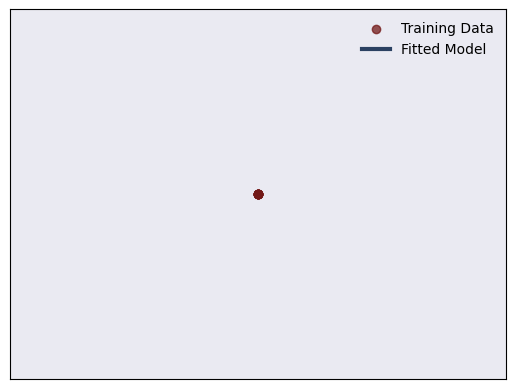

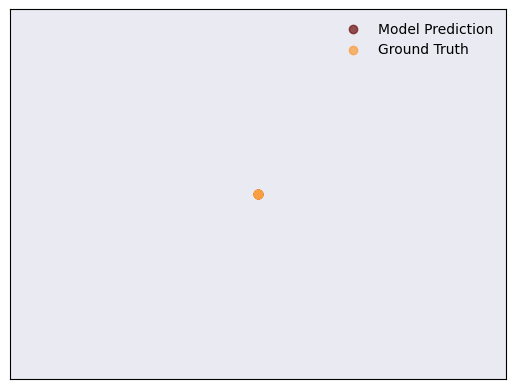

R2 Score: 0.0


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X, Y = load_csv_in_sklearn_format( "non_linear_dataset_100.csv" )

Y_pred = Y_to_replace
# please extend here

plot_model_fit( X, Y, X, Y_pred, filename="goodfit_polynomial_model.png" )

X_test, Y_ground_truth = load_csv_in_sklearn_format( "non_linear_dataset_test.csv" )

Y_pred_test = Y_to_replace
# please extend here

plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, filename="goodfit_polynomial_testdata.png" )

r2_score = 0.0
# please extend here
print( "R2 Score:", r2_score )

## Piecewise Polynomial

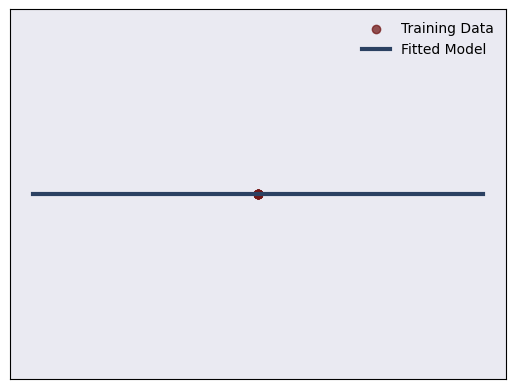

In [10]:
from scipy.interpolate import make_interp_spline

X_data, y_data = load_csv_in_sklearn_format( "non_linear_dataset_20.csv" )
x_data = [x[0] for x in X_data]
# please extend here

grid_x = numpy.linspace(-100, 100, 200)
evaluated_y = Y_to_replace

plot_model_fit( X_data, y_data, grid_x, evaluated_y, ylim=(-8500,8500), filename="overfit_spline_model.png" )

## Overfitting

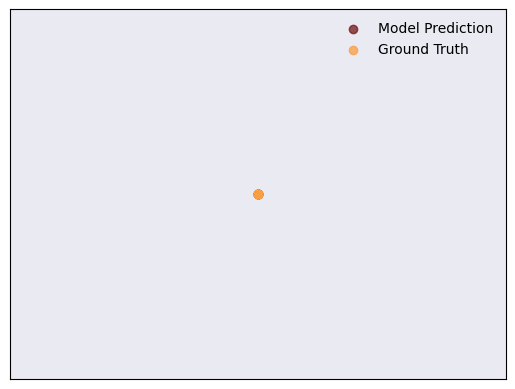

R2 Score: 0.0


In [11]:
X_test, Y_ground_truth = load_csv_in_sklearn_format( "non_linear_dataset_test.csv" )

Y_pred_test = Y_to_replace
# please extend here

plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, ylim=(-8500,8500), filename="overfit_spline_testdata.png" )

r2_score = 0.0
# please extend here

print( "R2 Score:", r2_score )